# Decision Tree

https://towardsdatascience.com/decision-tree-algorithm-explained-83beb6e78ef4

https://mlcourse.ai/articles/topic3-dt-knn/

https://towardsdatascience.com/types-of-regularization-in-machine-learning-eb5ce5f9bf50 -- Reguliraisation

https://www.youtube.com/watch?v=dGNJ-feQLC4 - Best video till now.


In [ ]:
#Machine Learning is a application where system gets the ability to automatically learn and improve based on experiences.
#Supervised Learning - If you already have data and awnsers like person will pay loan or not.
#Unsupervised Learning - Grouped liked information together like images of tree together.
#Reinforcement Learning - You dont have the data prior to the starting.

#When data is small and less complex we will use the Naive baise and Logistic regression.
#When data is bit complex then we will use decision tree but it has over fitting problem.
#When data is large so we will use random forest because it uses esemble library to make many trees.

#Decision tree is tree shaped daigram used to determine a course of action. Each branch of the tree represent a possible decision
#occurence or reaction.

#Decision tree can be used for classification and regression.When target variable is categorical then use classification tree
#else we will use regression tree when target variable will be continious and discreat.

#Disadvantages - Overfitting, High Varience, Low biase

# How we select the ordering of feathers. Which one variable will be the top or parent.
#It is based on ENTROPY. ENTOPY is measures of randomness.. Low entropy will be the parent one.
#GINI IMPURITY -  Creteria of probability of misclassification.
#Informarion gain - It is measure of decrease in entropy after the dataset is split. GAIN = E1 - E2

#Machine Learning Algorithms works on numbers not lables.

Recall the game of "20 Questions", which is often referenced when introducing decision trees. You've probably played this game -- one person thinks of a celebrity while the other tries to guess by asking only "Yes" or "No" questions. What question will the guesser ask first? Of course, they will ask the one that narrows down the number of the remaining options the most. Asking "Is it Angelina Jolie?" would, in the case of a negative response, leave all but one celebrity in the realm of possibility. In contrast, asking "Is the celebrity a woman?" would reduce the possibilities to roughly half. That is to say, the "gender" feature separates the celebrity dataset much better than other features like "Angelina Jolie", "Spanish", or "loves football." This reasoning corresponds to the concept of information gain based on entropy

If you look closely, these are exactly the mean values between the ages at which the target class "switches" from 1 to 0 or 0 to 1.

the simplest heuristics for handling numeric features in a decision tree is to sort its values in ascending order and check only those thresholds where the value of the target variable changes.

Attribute Selection Measures for decision tree .

Entropy,
Information gain,
Gini index,
Gain Ratio,
Reduction in Variance
Chi-Square

For classification, Information gain is used to select the feature where to start or root node and entropy or gini is used to
take care about the split.

While in regression, MSE or MAE would be used to slit the leaf node. Firstly it will sort the values and find mean and assign to root node than MSE and MAE of that node would be calculated.

Entropy - 

'''Entropy is a measure of the randomness in the information being processed. The higher the entropy, the harder it is to draw any conclusions from that information. Flipping a coin is an example of an action that provides information that is random.

A branch with an entropy of zero is a leaf node and A brach with entropy more than zero needs further splitting.

Entropy = sum (-plog2(p)) -- where pi is probablity of an event.Example - yes =9 and no =5 then 
E(5,9) = -(5/14log2(5/14)) -(9/14log2(9/14))
'''

Information Gain - 
'''
Information gain or IG is a statistical property that measures how well a given attribute separates the training examples according to their target classification. Constructing a decision tree is all about finding an attribute that returns the highest information gain and the smallest entropy.

How much any attribute gives information that is information gain. the reduction in entropy is called information gain. that gives the greatest information gain upon splitting

Information gain is a decrease in entropy. It computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values.

Information gain IG(T,X) = Entropy(T) - Entropy(T,X)  -- T means before and X means after.
'''

Gini Index -
'''
You can understand the Gini index as a cost function used to evaluate splits in the dataset. It is calculated by subtracting the sum of the squared probabilities of each class from one. It favors larger partitions and easy to implement whereas information gain favors smaller partitions with distinct values.

Gini = 1 - p(Success)2 -p(failure)2 

#### Gini impurity is much faster than entropy thats why most of the ensamble technique uses this parameter. Gini Impurity ranges between 0 to .5 and entropy would be 0 to 1.

Gini Index works with the categorical target variable “Success” or “Failure”. It performs only Binary splits. It refers the probablity of misclassification

Gain Ratio = Information gain / split ratio

Information gain is biased towards choosing attributes with a large number of values as root nodes. It means it prefers the attribute with a large number of distinct values.
Gain ratio which is a modification of Information gain that reduces its bias and is usually the best option. Gain ratio overcomes the problem with information gain by taking into account the number of branches that would result before making the split. It corrects information gain by taking the intrinsic information of a split into account.

Gain Ratio = Information gain / split ratio

'''


Reduction in variance -

'''
Reduction in variance is an algorithm used for continuous target variables (regression problems). This algorithm uses the 
standard formula of variance to choose the best split. The split with lower variance is selected as the criteria to split 
the population:

variance = sum(X-X(mean))2/n

'''

Chi-Square -

'''

It is one of the oldest tree classification methods. It finds out the statistical significance between the differences
between sub-nodes and parent node. We measure it by the sum of squares of standardized differences between observed and 
expected frequencies of the target variable.
It works with the categorical target variable “Success” or “Failure”. It can perform two or more splits. Higher the value of
Chi-Square higher the statistical significance of differences between sub-node and Parent node.

Chi Square = (O-E)2/E -- O is observed value and E is expected value.

'''

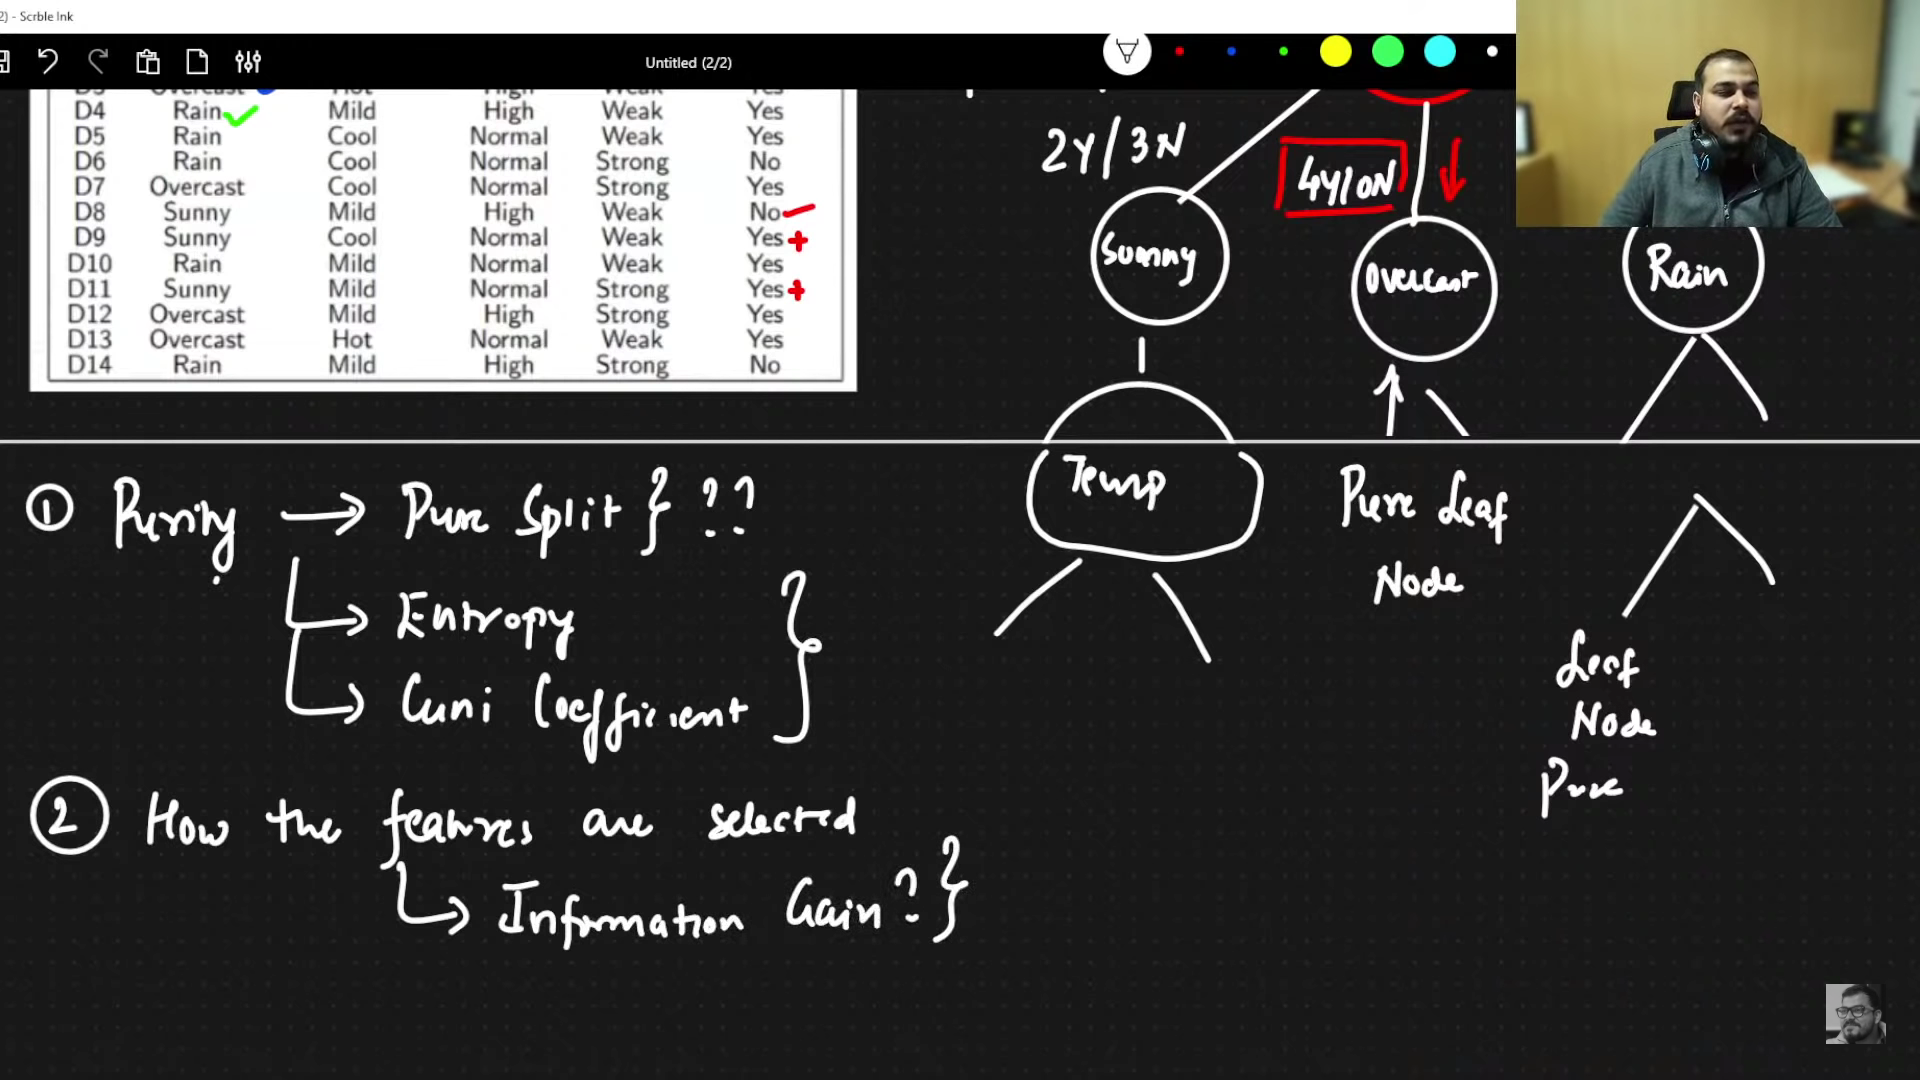 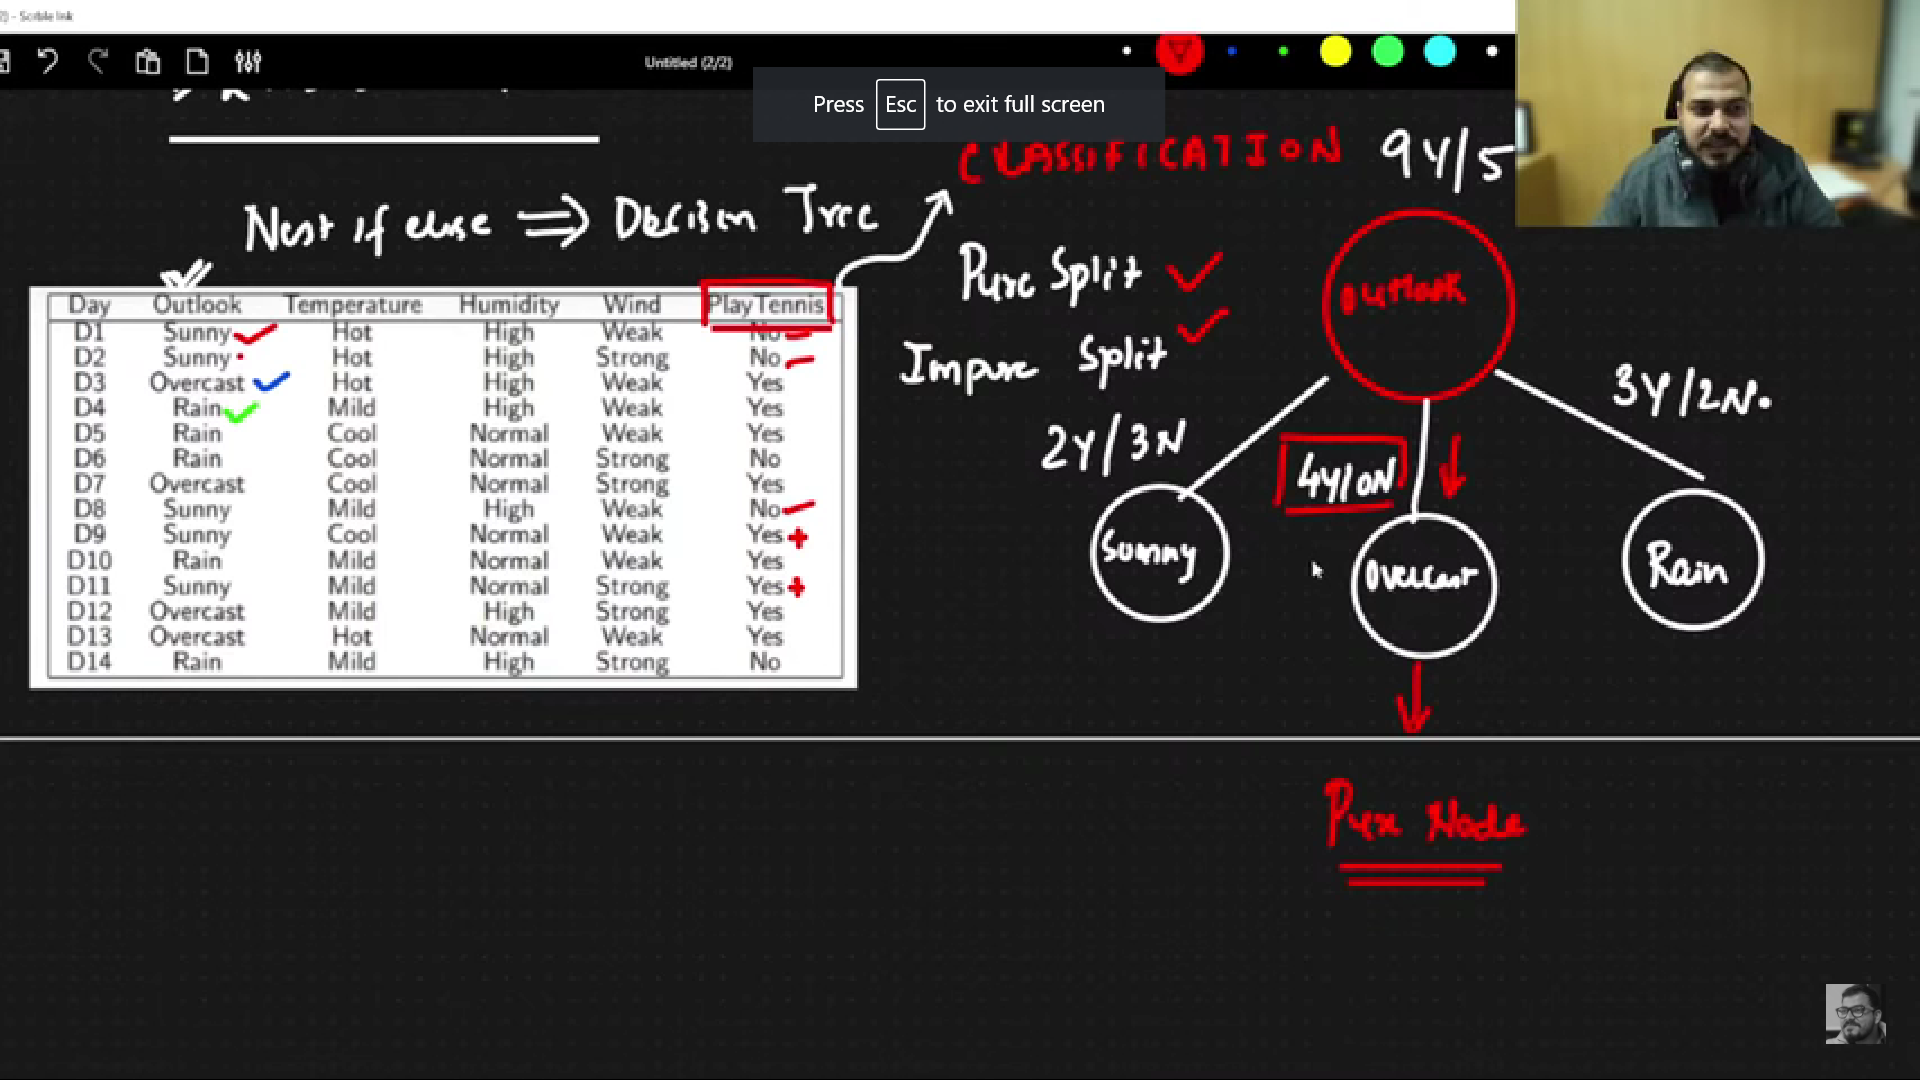 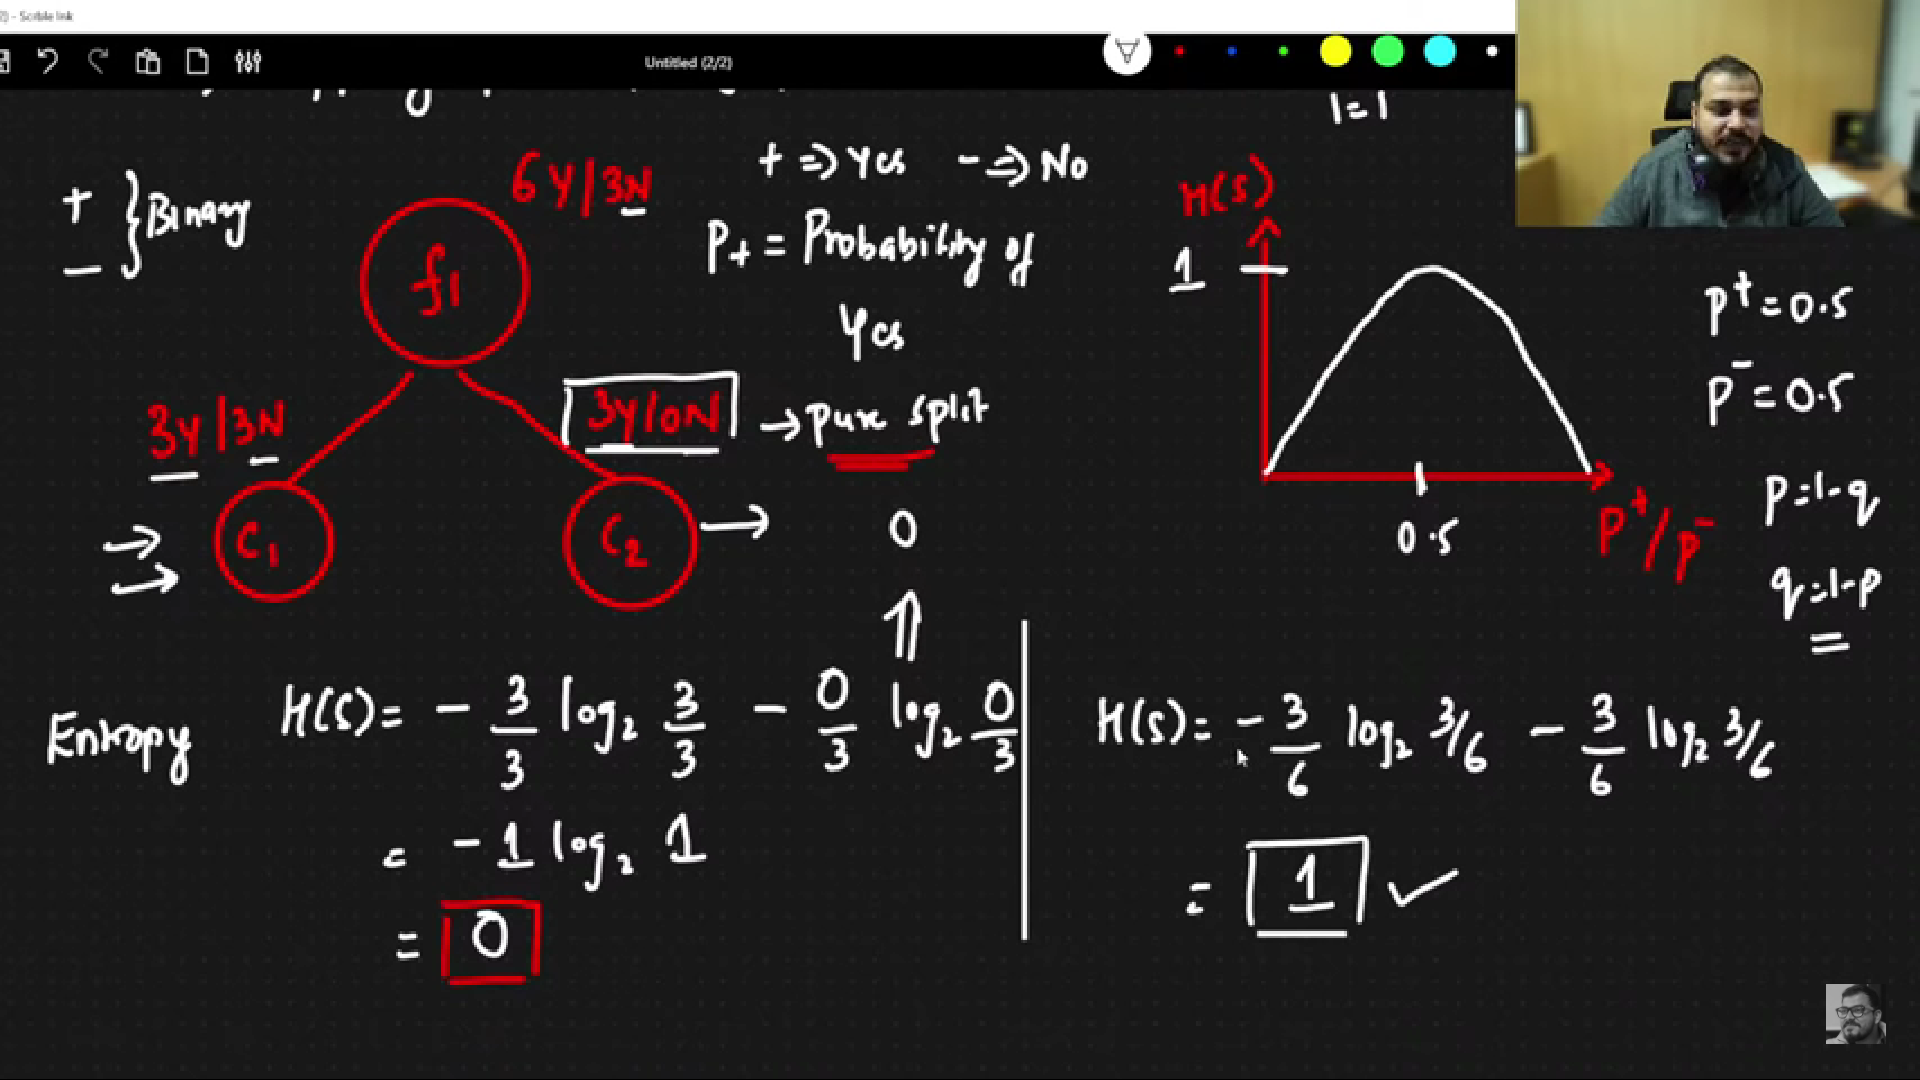 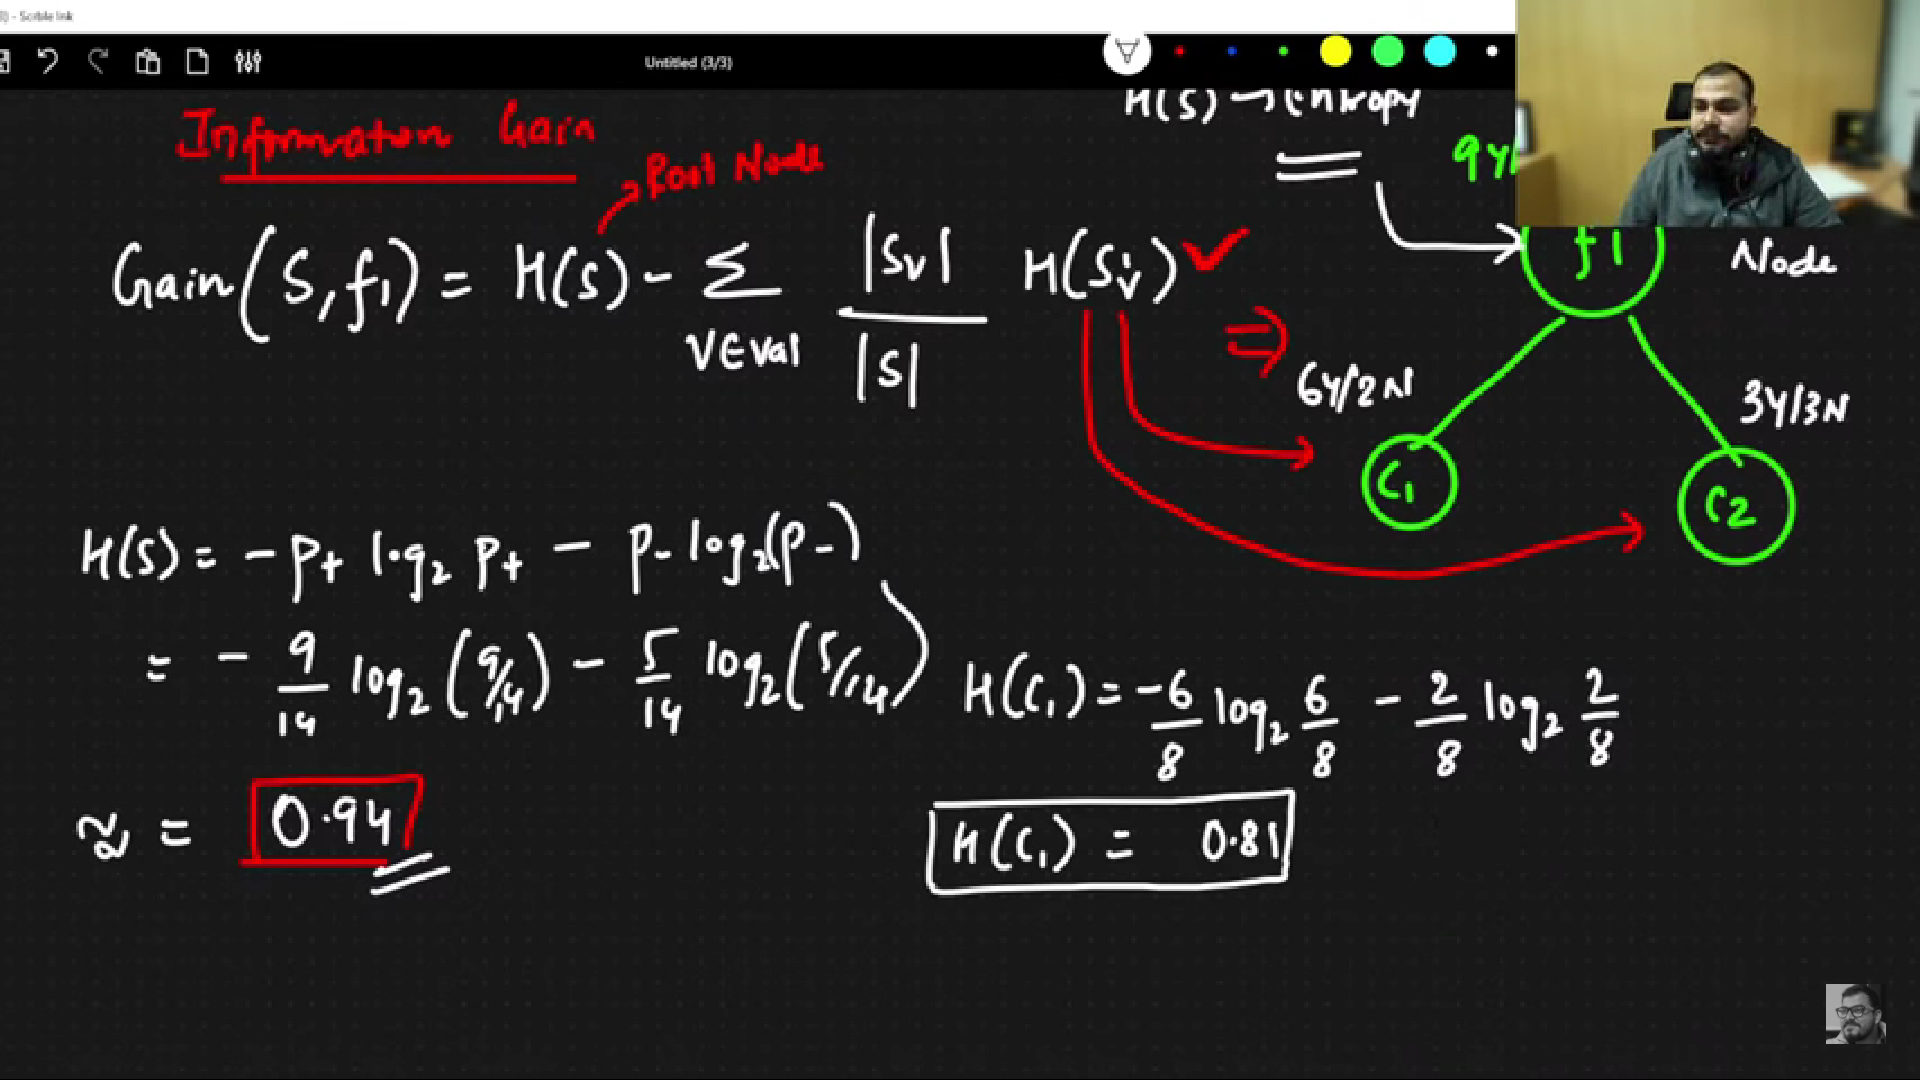 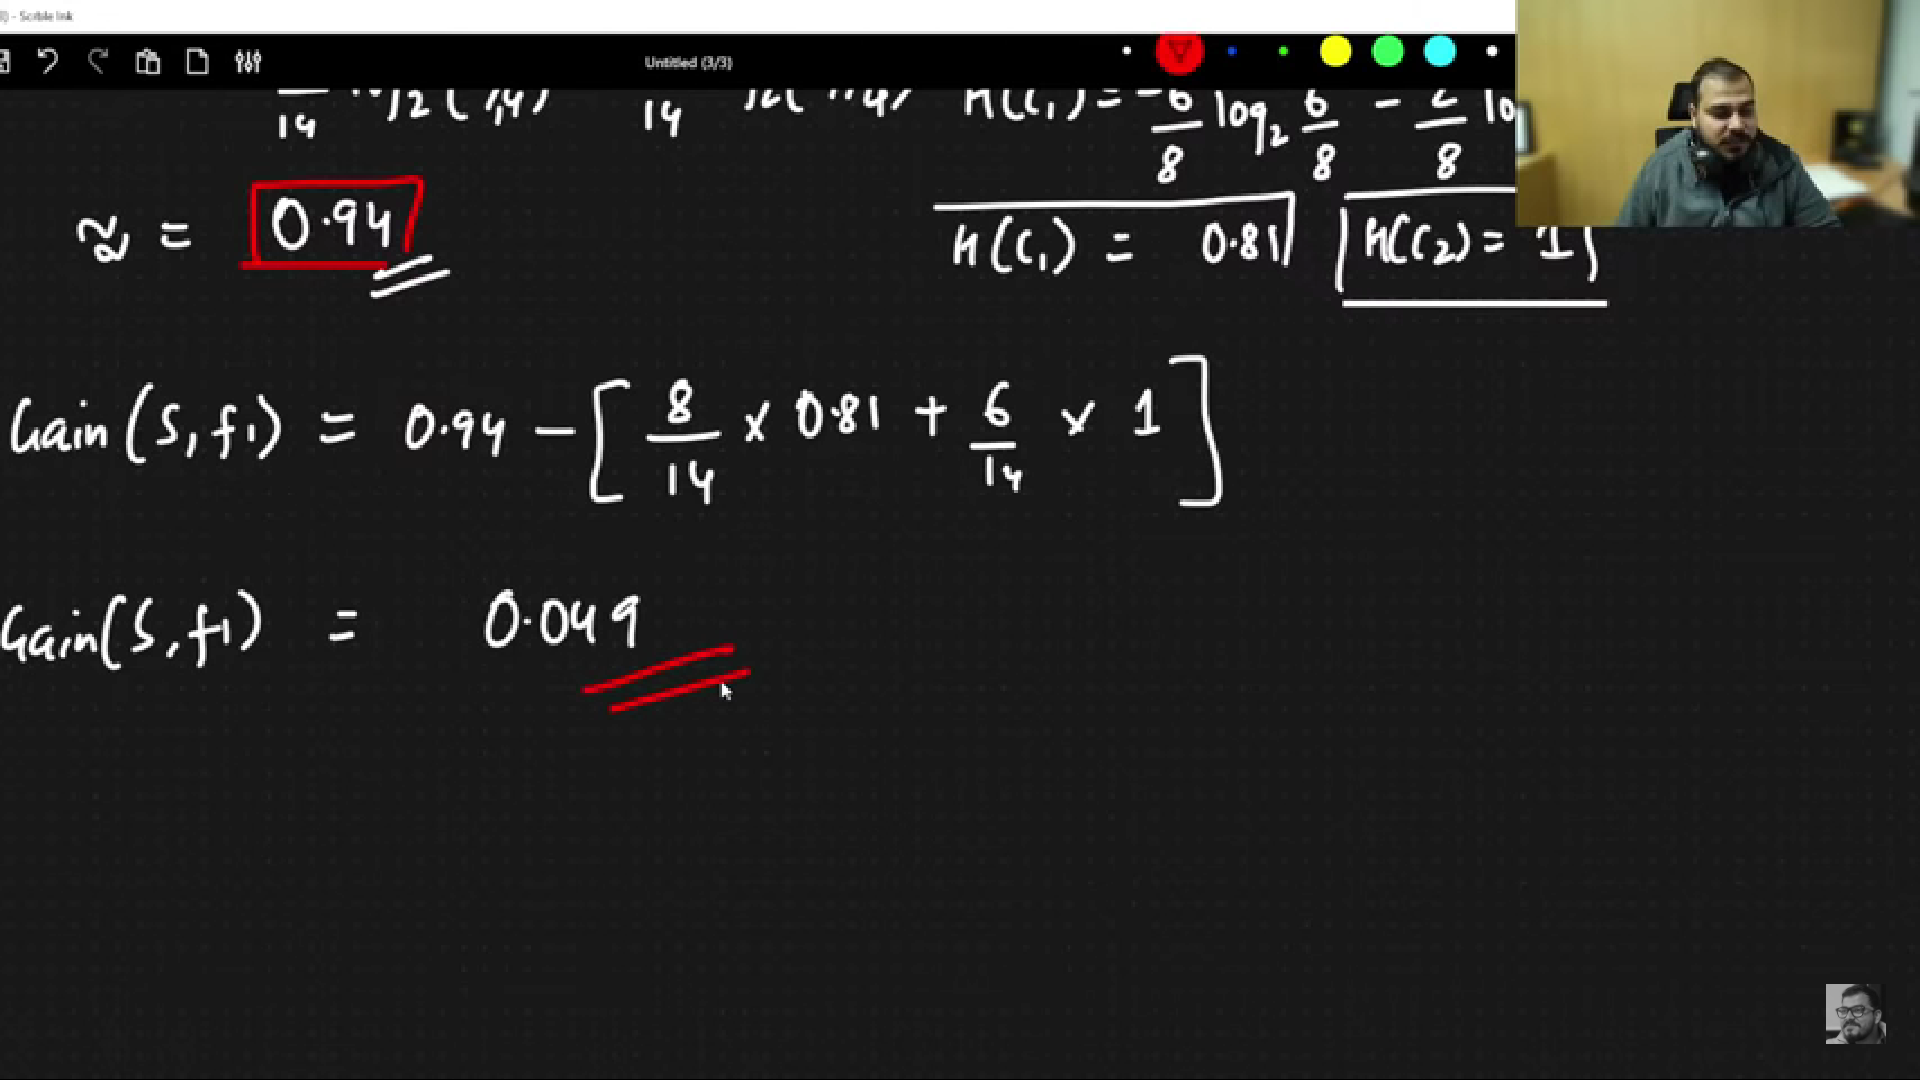 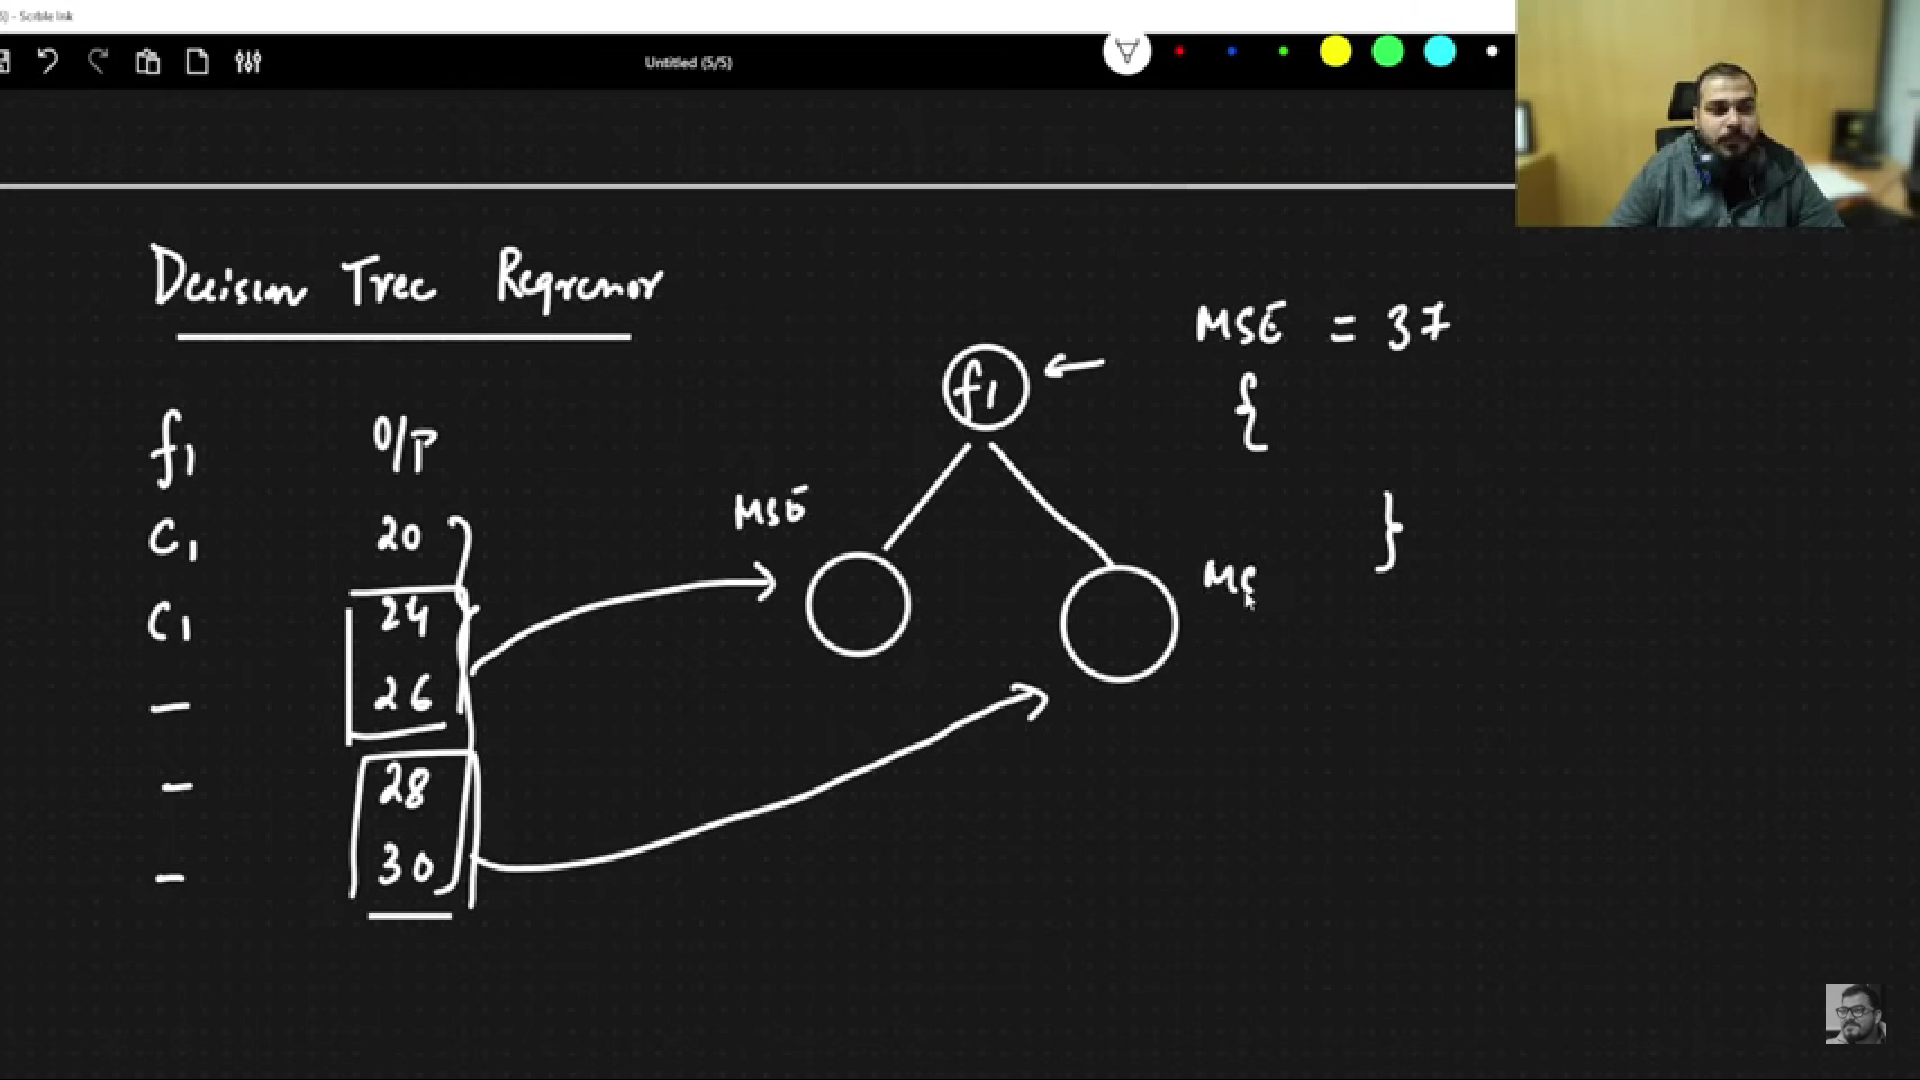 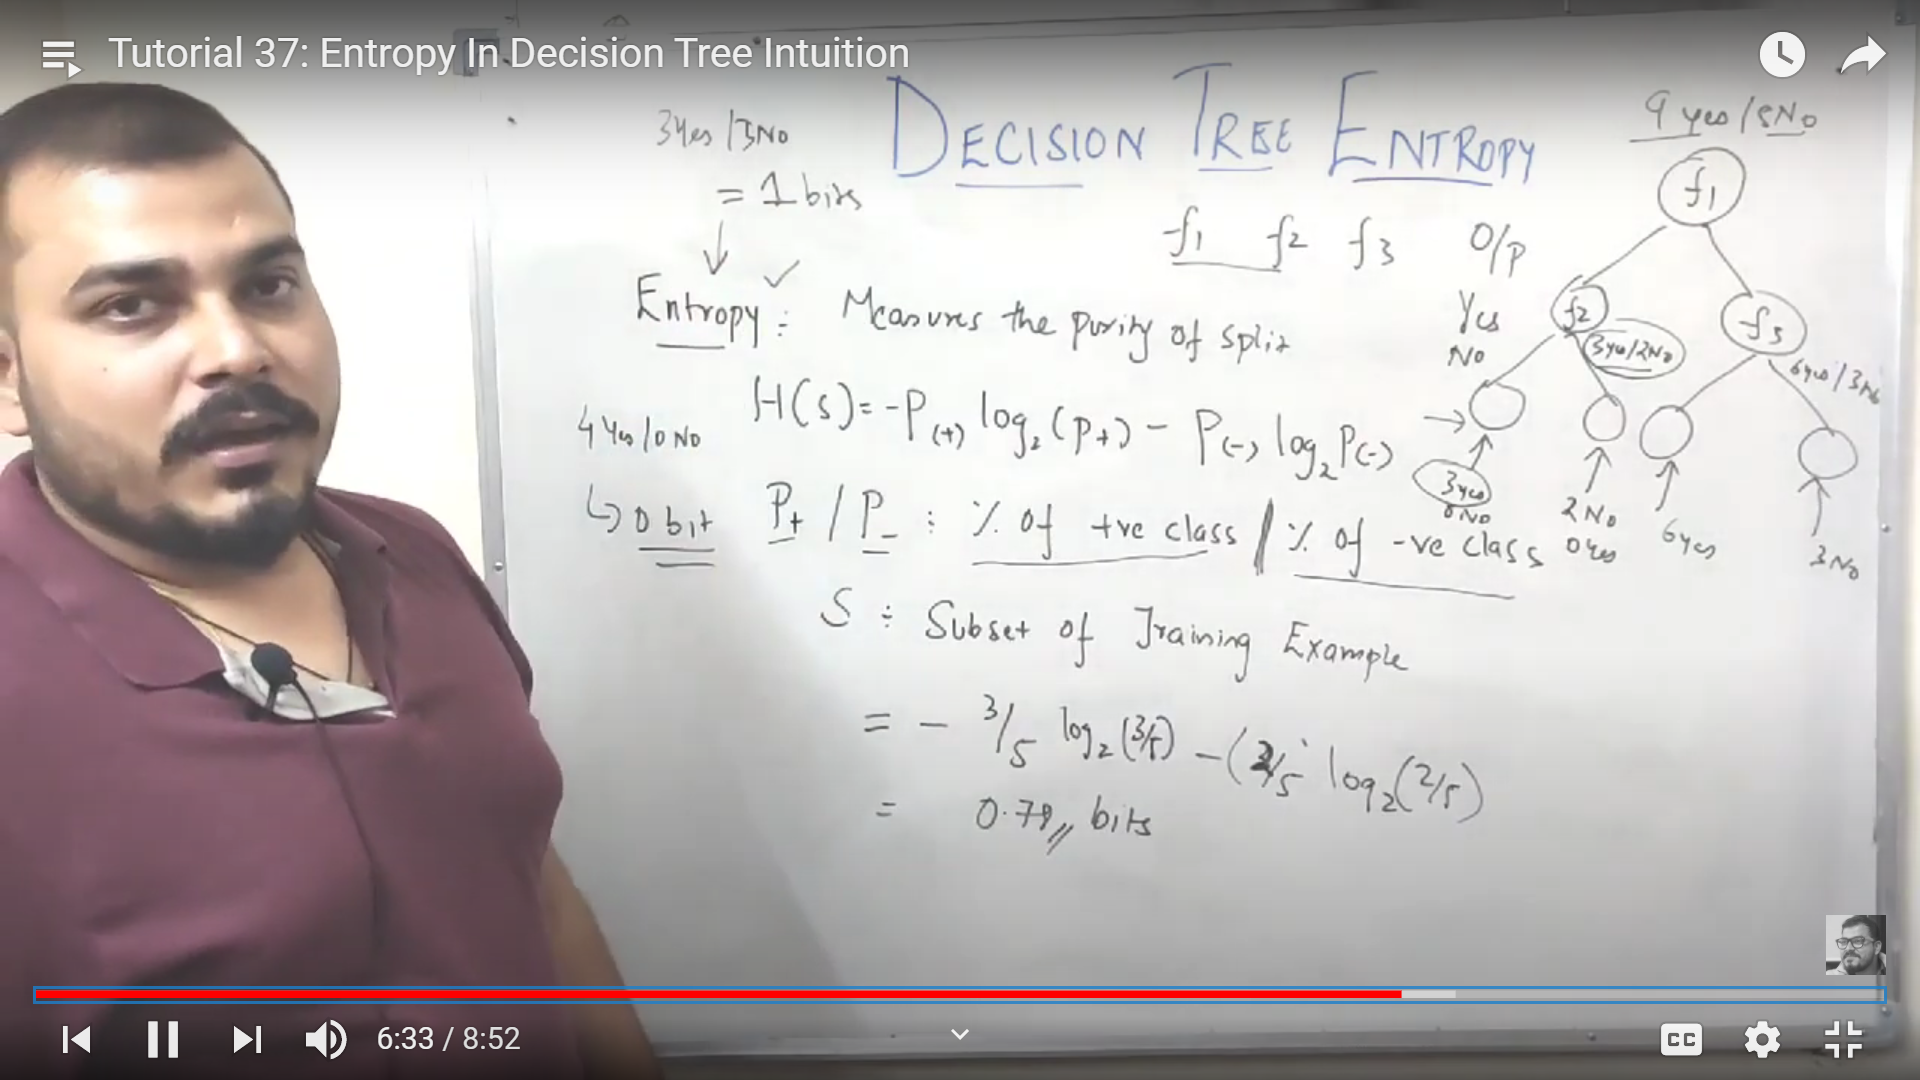 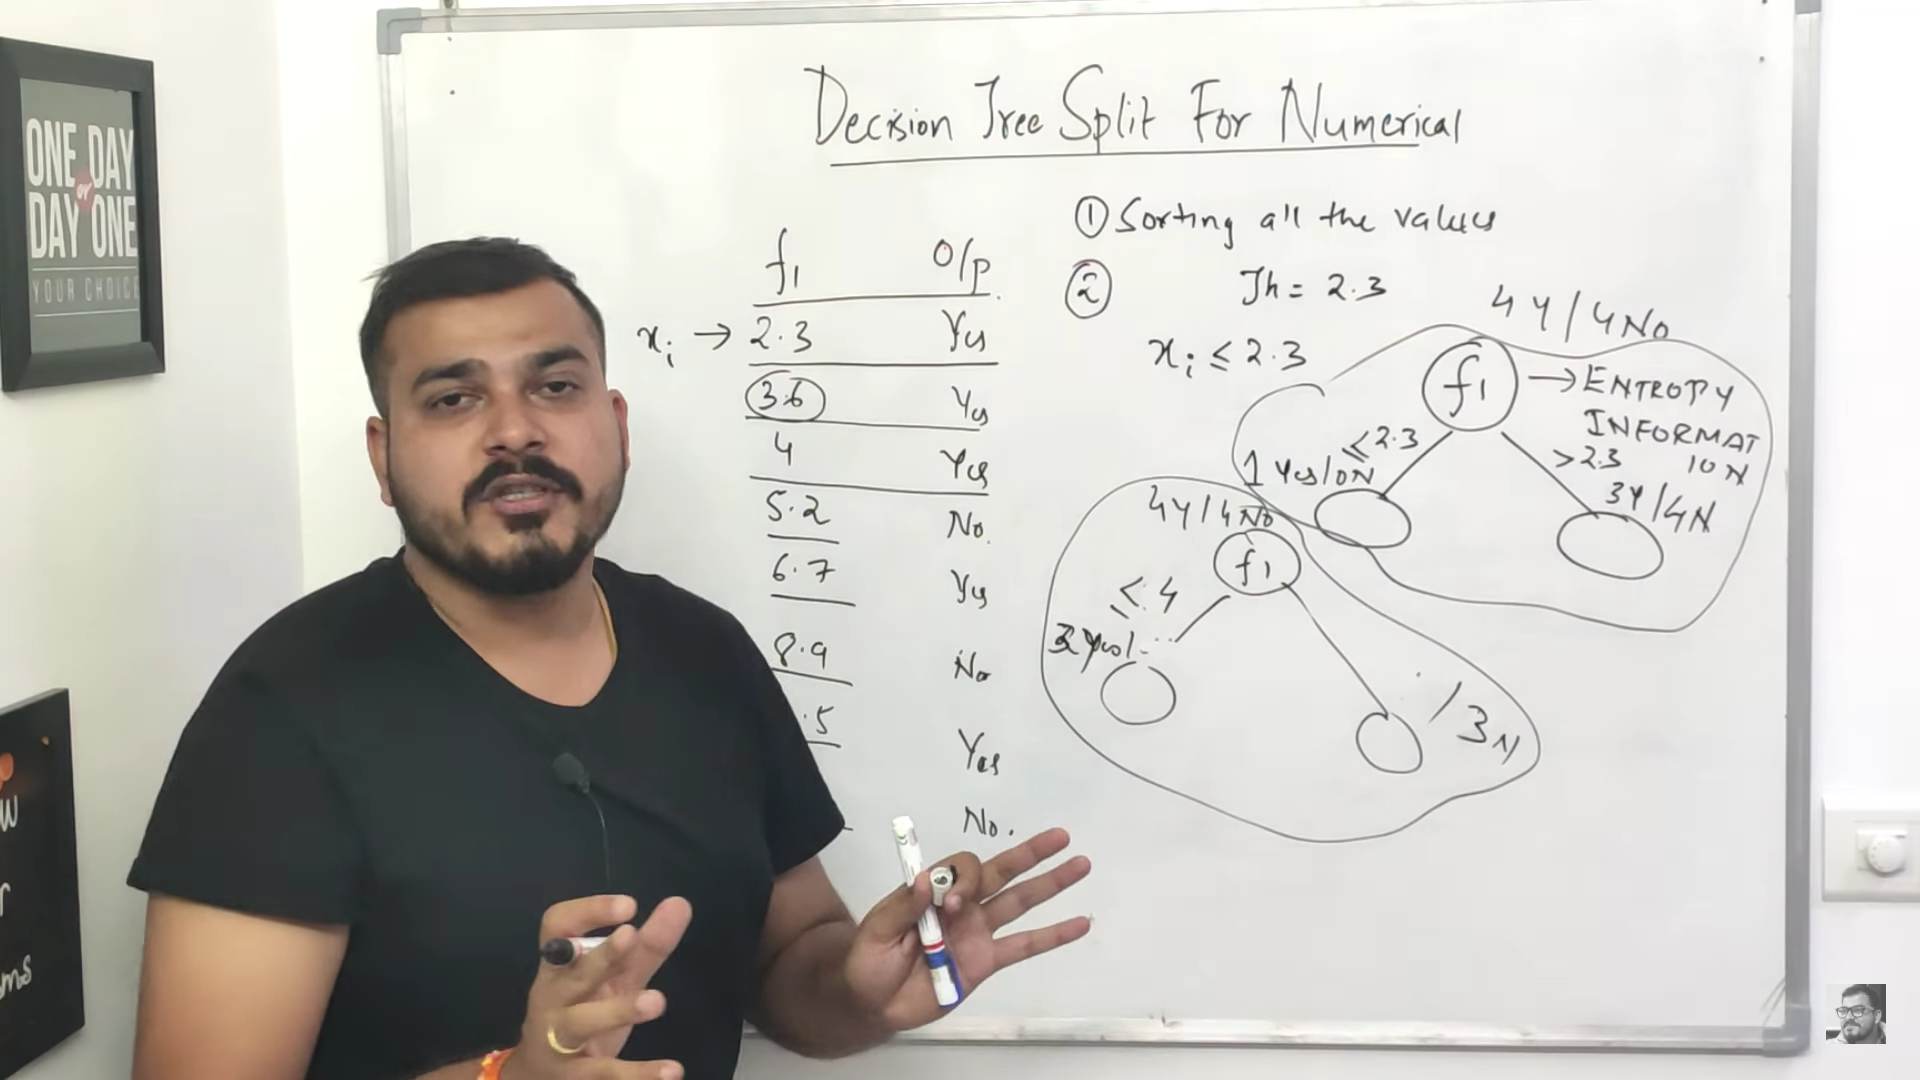

In [15]:
import pandas as pd

df = pd.read_csv('D:\\Work\\Python\\Python ML\\ML\\9_decision_tree\\salaries.csv')
df.head()

inputs=df.drop('salary_more_then_100k', axis='columns')
target=df['salary_more_then_100k']

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import *

Le_company=LabelEncoder()
Le_job=LabelEncoder()
Le_degree=LabelEncoder()

inputs['company_n'] = Le_company.fit_transform(inputs['company'])
inputs['job_n'] = Le_company.fit_transform(inputs['job'])
inputs['degree_n'] = Le_company.fit_transform(inputs['degree'])

inputs.head()

inputs_n = inputs.drop(['company','job','degree'], axis='columns')
inputs_n

from sklearn import tree

model =tree.DecisionTreeClassifier() # Not using traina dn test data coz we want to make ot simple for it now.
model.fit(inputs_n,target) #criterion='gini' by default
model.score(inputs_n,target) #1.0

model.predict([[2,2,1]])

array([0], dtype=int64)

In [5]:
#Adjusting Your Algorithms
#
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import *

model =RandomForestClassifier(class_weight='balanced')
#Weight option is also takes manual input like - class_weight={0:1,1:4}

model =RandomForestClassifier(class_weight='balanced_subsample')

model =LogisticRegression(class_weight='balanced')

model = SVC(kernel='linear',class_weight='balanced', probability=True)

#GridSearchCV evalutes all combination of parameters defined in paarmeter grid in model.
#https://towardsdatascience.com/understanding-hyperparameters-and-its-optimisation-techniques-f0debba07568- Hyperparameter Techniques

from sklearn.model_selection import GridSearchCV
#create parameter grid
param_grid ={
    'max-depth' :{80,45,72}
    'n_estimator':{100,200,300}}

model = RandomForestClassifier()
#initiate the gridsearchmodel
grid_search_model = GridSearchCV(estimator=model,
                                param_grid=param_grid,cv=5,n_jobs=-1, scoring='f1')

# Define the parameter sets to test
param_grid = {'n_estimators': [1, 30], 'max_features': ['auto', 'log2'], 'max_depth': [4, 8], 'criterion': ['gini', 'entropy']
}

# Define the model to use
model = RandomForestClassifier(random_state=5)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
CV_model.best_params_

# Input the optimal parameters in the model
model = RandomForestClassifier(class_weight={0:1,1:12}, criterion='gini',
            max_depth=8, max_features='log2', min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)

# Get results from your model
get_model_results(X_train, y_train, X_test, y_test, model)



In [ ]:
######################### Exercise ##########################
# Project titanic dataset

from sklearn.tree import DecisionTreeClassifier

In [14]:
# Loan repayment use cases

#Importing neccessary packages
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split - depreciated
from sklearn.metrics import accuracy_score

#Loading data file
balance_data =pd.read_csv('C:\\Users\\rimanshu\\Desktop\\Jupyter\\Loan Repayment.csv')
balance_data.head()

df = balance_data.rename(columns={"not.fully.paid": "not_fully_paid"})

df.not_fully_paid.unique()



array([0, 1], dtype=int64)

In [8]:
print("Dataset Length :", len(balance_data))
print("Dataset Shape :", balance_data.shape)

Dataset Length : 9578
Dataset Shape : (9578, 14)
